# Importation packages

In [3]:
# libraries to manage data
import pandas as pd
import numpy as np

# libraries data viz
import matplotlib.pyplot as plt
import seaborn as sbn

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [226]:
# libraries data viz
# import autoviz

In [5]:
# understand data

In [23]:
df_mobile_usage = pd.read_csv("./data/mobile_usage_behavioral_analysis.csv")

In [31]:
# df_mobile_usage.head()

In [27]:
df_mobile_usage.set_index("User_ID", inplace=True)

In [29]:
df_mobile_usage.head()

,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location
User_ID,,,,,,,,,
1,56,Male,2.61,7.15,24,4.43,0.55,2.40,Los Angeles
2,46,Male,2.13,13.79,18,4.67,4.42,2.43,Chicago
3,32,Female,7.28,4.50,11,4.58,1.71,2.83,Houston
4,25,Female,1.20,6.29,21,3.18,3.42,4.58,Phoenix
5,38,Male,6.31,12.59,14,3.15,0.13,4.00,New York


# Analyse descriptive univariée

In [33]:
df_mobile_usage.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           1000 non-null   int64  
 1   Gender                        1000 non-null   object 
 2   Total_App_Usage_Hours         1000 non-null   float64
 3   Daily_Screen_Time_Hours       1000 non-null   float64
 4   Number_of_Apps_Used           1000 non-null   int64  
 5   Social_Media_Usage_Hours      1000 non-null   float64
 6   Productivity_App_Usage_Hours  1000 non-null   float64
 7   Gaming_App_Usage_Hours        1000 non-null   float64
 8   Location                      1000 non-null   object 
dtypes: float64(5), int64(2), object(2)
memory usage: 78.1+ KB


In [37]:
df_mobile_usage.shape

(1000, 9)

In [50]:
# analyse des données manquantes
df_mobile_usage.isnull().sum()

Age                             0
Gender                          0
Total_App_Usage_Hours           0
Daily_Screen_Time_Hours         0
Number_of_Apps_Used             0
Social_Media_Usage_Hours        0
Productivity_App_Usage_Hours    0
Gaming_App_Usage_Hours          0
Location                        0
dtype: int64

In [35]:
df_mobile_usage.describe()

,Age,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,38.745000,6.405670,7.696310,16.64700,2.456330,2.495270,2.475410
std,12.186734,3.134855,3.714187,7.61961,1.439525,1.443392,1.450362
min,18.000000,1.000000,1.010000,3.00000,0.000000,0.000000,0.010000
25%,28.000000,3.590000,4.530000,10.00000,1.200000,1.282500,1.220000
50%,40.000000,6.455000,7.880000,17.00000,2.445000,2.435000,2.455000
75%,50.000000,9.122500,10.910000,23.00000,3.672500,3.710000,3.782500
max,59.000000,11.970000,14.000000,29.00000,4.990000,5.000000,5.000000


In [39]:
df_mobile_usage.describe(include="object")

,Gender,Location
count,1000,1000
unique,2,5
top,Male,New York
freq,517,243


<Axes: >

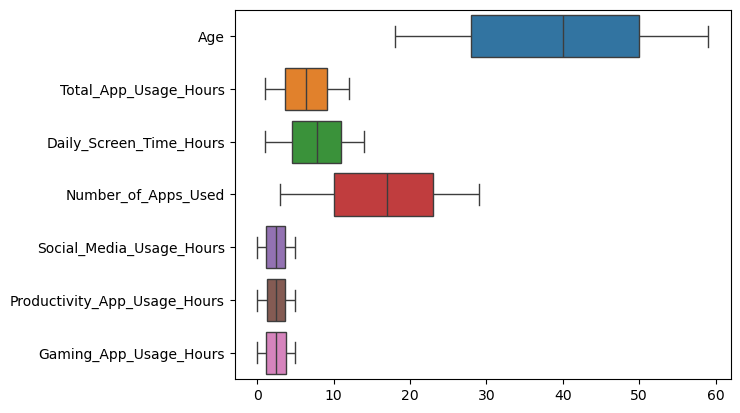

In [56]:
sbn.boxplot(df_mobile_usage, orient="h")

## Distribution des variables

In [71]:
vars_numeric = df_mobile_usage.select_dtypes(include="number").columns

In [73]:
vars_numeric

Index(['Age', 'Total_App_Usage_Hours', 'Daily_Screen_Time_Hours',
       'Number_of_Apps_Used', 'Social_Media_Usage_Hours',
       'Productivity_App_Usage_Hours', 'Gaming_App_Usage_Hours'],
      dtype='object')

In [325]:
def get_class_age(x):
    if x in range(0,29):
        return "0-28"
    if x in range(29,41):
        return "29-40"
    if x in range(41,51):
        return "41-50"
    return "50+"
get_class_age(51)


'50+'

In [327]:
df_mobile_usage["classe_age"] = df_mobile_usage["Age"].apply(get_class_age)

In [329]:
df_mobile_usage

,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location,class,classe_age
User_ID,,,,,,,,,,,
1,56,Male,2.61,7.15,24,4.43,0.55,2.40,Los Angeles,5,50+
2,46,Male,2.13,13.79,18,4.67,4.42,2.43,Chicago,5,41-50
3,32,Female,7.28,4.50,11,4.58,1.71,2.83,Houston,4,29-40
4,25,Female,1.20,6.29,21,3.18,3.42,4.58,Phoenix,5,0-28
5,38,Male,6.31,12.59,14,3.15,0.13,4.00,New York,5,29-40
...,...,...,...,...,...,...,...,...,...,...,...
996,41,Female,3.58,12.46,13,4.12,2.44,1.33,Los Angeles,5,41-50
997,32,Male,9.65,10.51,11,1.02,1.02,3.84,Los Angeles,3,29-40
998,46,Female,11.68,10.06,9,2.35,3.13,1.03,Phoenix,2,41-50


In [188]:
vars_quantitative = [col for col in df_mobile_usage.columns if col not in vars_numeric]
vars_quantitative

['Gender', 'Location']

In [190]:
from sklearn import datasets
from sklearn.cluster import KMeans

In [230]:
df_mobile_usage_num_scaled = StandardScaler().fit_transform(df_mobile_usage[vars_numeric])

In [232]:
# Une liste vide pour enregistrer les inerties :  
intertia_list = [ ]

# Notre liste de nombres de clusters : 
k_list = range(1, 10)

# Pour chaque nombre de clusters : 
for k in k_list : 
    
    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k)
    
    # On entraine
    kmeans.fit(df_mobile_usage_num_scaled)
    
    # On enregistre l'inertie obtenue : 
    intertia_list.append(kmeans.inertia_)

C:\Users\skandass\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\skandass\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\skandass\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\skandass\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory le

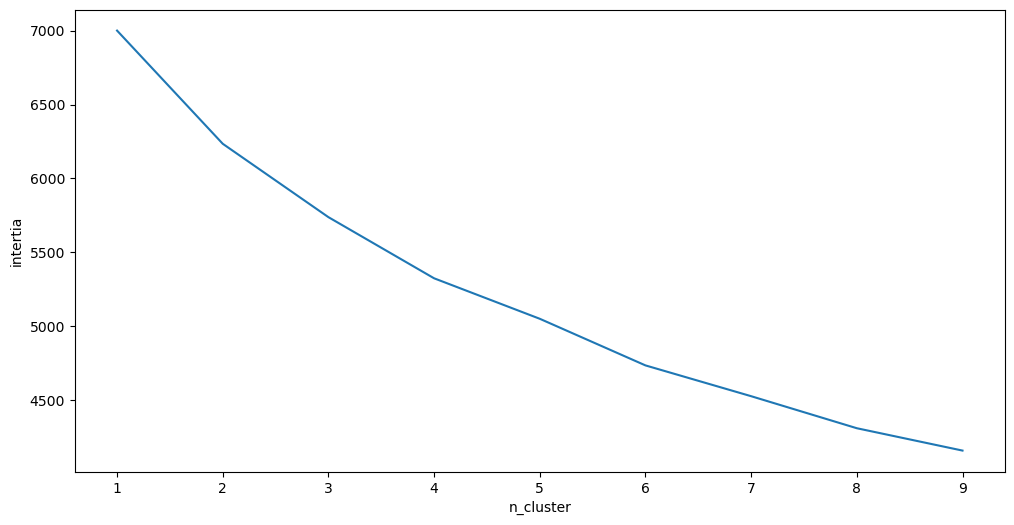

In [234]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")

ax = plt.plot(k_list, intertia_list)

In [238]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(df_mobile_usage_num_scaled)

# plt.scatter(df_mobile_usage_num_scaled,c=kmeans.labels_)
# plt.show()

C:\Users\skandass\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=6)

In [240]:
df_mobile_usage["class"] = kmeans.labels_
df_mobile_usage

,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location,class
User_ID,,,,,,,,,,
1,56,Male,2.61,7.15,24,4.43,0.55,2.40,Los Angeles,5
2,46,Male,2.13,13.79,18,4.67,4.42,2.43,Chicago,5
3,32,Female,7.28,4.50,11,4.58,1.71,2.83,Houston,4
4,25,Female,1.20,6.29,21,3.18,3.42,4.58,Phoenix,5
5,38,Male,6.31,12.59,14,3.15,0.13,4.00,New York,5
...,...,...,...,...,...,...,...,...,...,...
996,41,Female,3.58,12.46,13,4.12,2.44,1.33,Los Angeles,5
997,32,Male,9.65,10.51,11,1.02,1.02,3.84,Los Angeles,3
998,46,Female,11.68,10.06,9,2.35,3.13,1.03,Phoenix,2


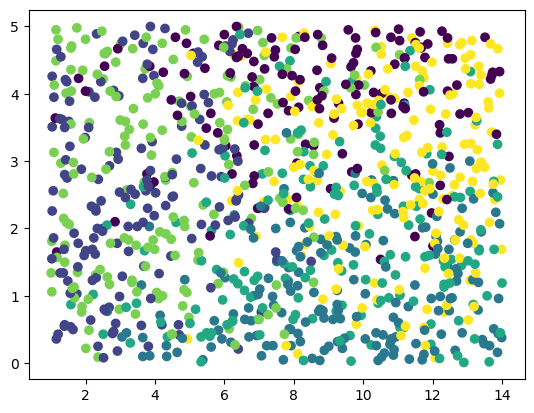

In [252]:
plt.scatter(df_mobile_usage["Daily_Screen_Time_Hours"], df_mobile_usage["Gaming_App_Usage_Hours"], c=df_mobile_usage["class"])
plt.show()

In [212]:
df_mobile_usage.describe()

,Age,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,class
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,38.745000,6.405670,7.696310,16.64700,2.456330,2.495270,2.475410,0.529000
std,12.186734,3.134855,3.714187,7.61961,1.439525,1.443392,1.450362,0.499408
min,18.000000,1.000000,1.010000,3.00000,0.000000,0.000000,0.010000,0.000000
25%,28.000000,3.590000,4.530000,10.00000,1.200000,1.282500,1.220000,0.000000
50%,40.000000,6.455000,7.880000,17.00000,2.445000,2.435000,2.455000,1.000000
75%,50.000000,9.122500,10.910000,23.00000,3.672500,3.710000,3.782500,1.000000
max,59.000000,11.970000,14.000000,29.00000,4.990000,5.000000,5.000000,1.000000


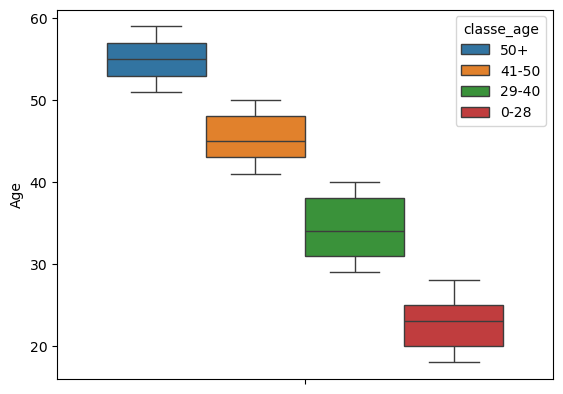

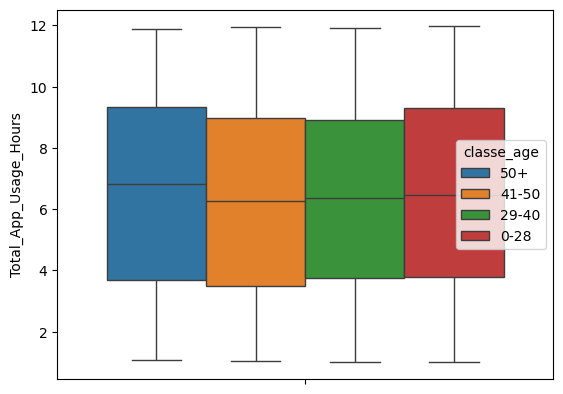

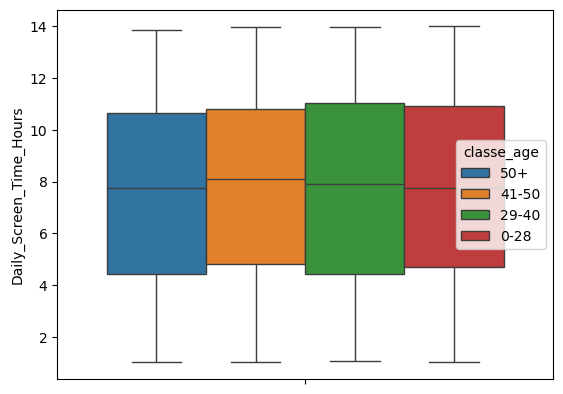

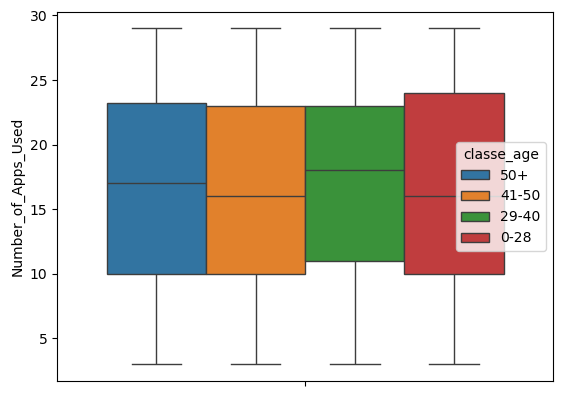

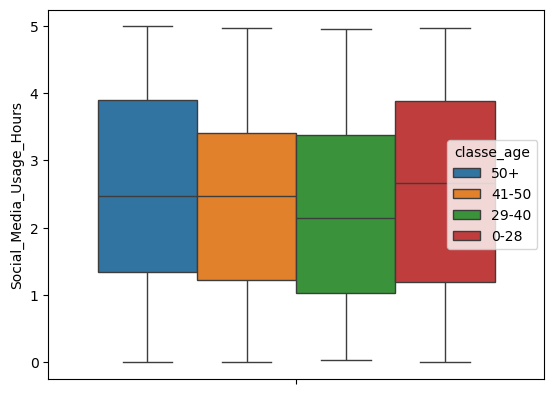

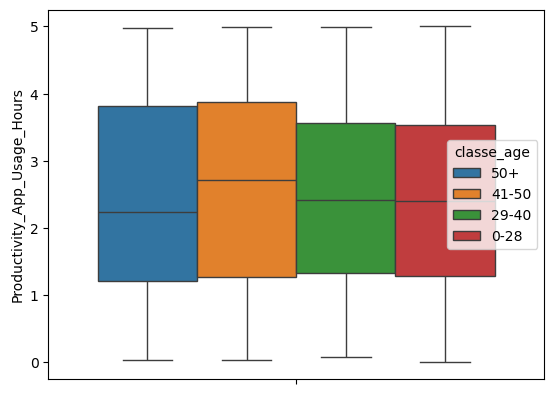

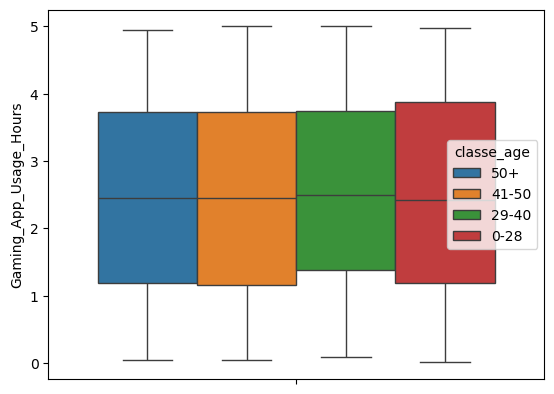

In [331]:
# histogrammme des variables numériques
for col in vars_numeric:
    plt.figure()
    # sbn.histplot(df_mobile_usage, x=col, hue="Gender", multiple="dodge")
    sbn.boxplot(df_mobile_usage, y=col, hue="classe_age")
    # sbn.boxplot(df_mobile_usage, y=col, hue="Gender")
    # sbn.countplot(df_mobile_usage, x=col, hue="Gender")
    plt.show()

In [ ]:
# sbn.countplot(df_mobile_usage["Gender"])

In [270]:
# sbn.countplot(df_mobile_usage["Location"])

# Analyse descriptive bivariée

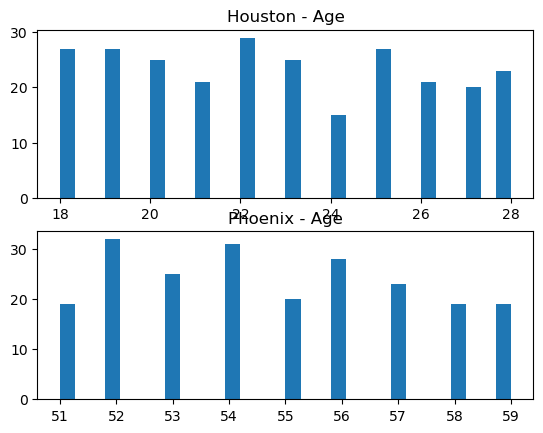

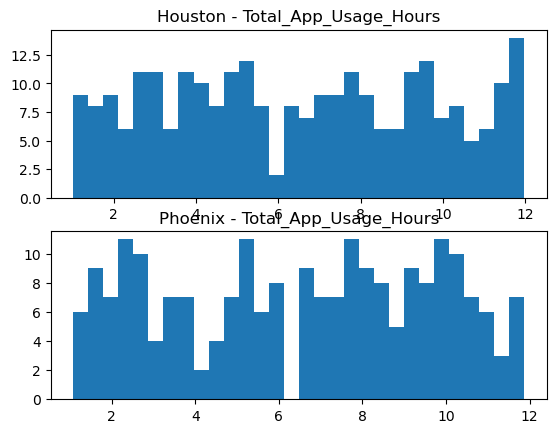

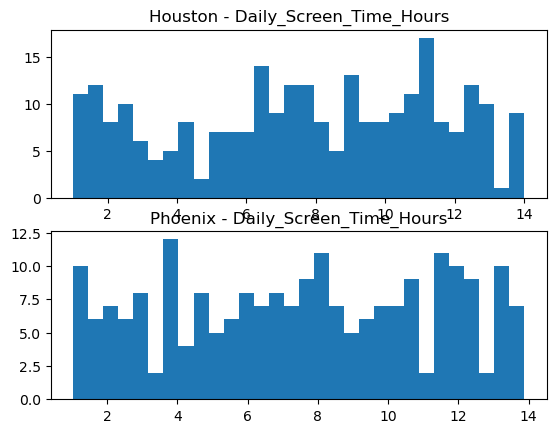

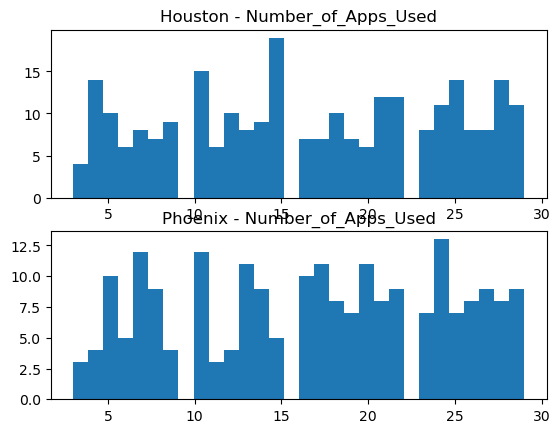

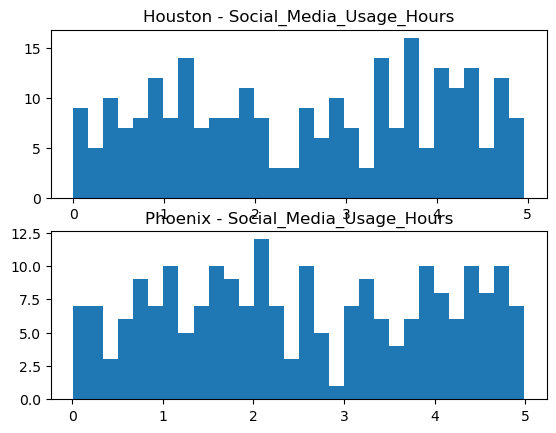

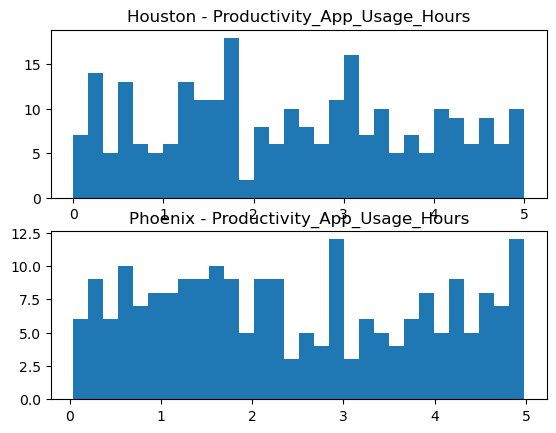

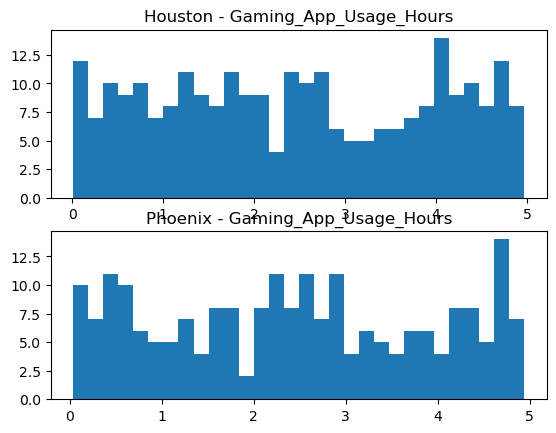

In [333]:
# sbn.pairplot(df_mobile_usage[df_mobile_usage['Gender'] == "Male"])
locations = df_mobile_usage["Location"].unique()

# for loc in locations:
for col in vars_numeric:
    # plt.figure()
    plt.figure(1)
    plt.subplot(211)
    # plt.plot(t, s1)
    plt.hist(df_mobile_usage[df_mobile_usage["classe_age"] == "0-28"][col], bins=30)
    plt.title("Houston - " + col)
    plt.subplot(212)
    # plt.plot(t, 2*s1)
    plt.hist(df_mobile_usage[df_mobile_usage["classe_age"] == "50+"][col], bins=30)
    plt.title("Phoenix - " + col)
    plt.show()


In [339]:
# Test de Kruskal-Wallis

from scipy.stats import ttest_ind, f_oneway, mannwhitneyu, kruskal, wilcoxon

for col in vars_numeric:
    kruskal_stat, kruskal_p_value = kruskal(df_mobile_usage[df_mobile_usage["classe_age"] == "0-28"][col]
                                            , df_mobile_usage[df_mobile_usage["classe_age"] == "29-40"][col], 
                                            df_mobile_usage[df_mobile_usage["classe_age"] == "41-50"][col]
                                            , df_mobile_usage[df_mobile_usage["classe_age"] == "50+"][col])
    # kruskal_stat, kruskal_p_value = kruskal(df_mobile_usage[df_mobile_usage["Location"] == "Houston"][col]
    #                                         , df_mobile_usage[df_mobile_usage["Location"] == "Phoenix"][col]
    #                                         , df_mobile_usage[df_mobile_usage["Location"] == "New York"][col] 
    #                                        , df_mobile_usage[df_mobile_usage["Location"] == "Chicago"][col]
    #                                        , df_mobile_usage[df_mobile_usage["Location"] == "Los Angeles"][col])
    print("Statistique H de Kruskal-Wallis - " + str(col) + " : " + str(kruskal_stat))
    print("P-valeur (Kruskal-Wallis) - " + str(col) + " : " + str(kruskal_p_value))

Statistique H de Kruskal-Wallis - Age : 936.0289347369
P-valeur (Kruskal-Wallis) - Age : 1.355024986737248e-202
Statistique H de Kruskal-Wallis - Total_App_Usage_Hours : 1.1143987982695323
P-valeur (Kruskal-Wallis) - Total_App_Usage_Hours : 0.7735993427832784
Statistique H de Kruskal-Wallis - Daily_Screen_Time_Hours : 1.0374287769740909
P-valeur (Kruskal-Wallis) - Daily_Screen_Time_Hours : 0.7921963264597428
Statistique H de Kruskal-Wallis - Number_of_Apps_Used : 2.435206144556942
P-valeur (Kruskal-Wallis) - Number_of_Apps_Used : 0.48711465859715497
Statistique H de Kruskal-Wallis - Social_Media_Usage_Hours : 4.260655661668303
P-valeur (Kruskal-Wallis) - Social_Media_Usage_Hours : 0.23465883119952632
Statistique H de Kruskal-Wallis - Productivity_App_Usage_Hours : 1.9261546127847158
P-valeur (Kruskal-Wallis) - Productivity_App_Usage_Hours : 0.5878741448460705
Statistique H de Kruskal-Wallis - Gaming_App_Usage_Hours : 0.4258968529485452
P-valeur (Kruskal-Wallis) - Gaming_App_Usage_Hours

In [168]:
# sbn.pairplot(df_mobile_usage[df_mobile_usage['Gender'] == "Female"])

In [92]:
# # matrice de corrélation
# matrice_correl_mobile = df_mobile_usage[vars_numeric].corr()

In [290]:
# # calcul de la correlation et p-value
# sbn.heatmap(matrice_correl_mobile, annot=True, cmap="YlGnBu")

# Analyse multivariée avec l'ACP

## Concstruction de l'ACP

In [122]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [118]:
# normalisation et réduction des variables
scaler = StandardScaler()
df_mobile_usage_num_scaled = scaler.fit_transform(df_mobile_usage[vars_numeric])

In [126]:
# PCA
pca = PCA() 
df_mobile_usage_num_scaled_pca = pca.fit(df_mobile_usage_num_scaled)

In [132]:
df_mobile_usage_num_scaled_pca.explained_variance_ratio_

array([0.1579396 , 0.15009815, 0.14864677, 0.14360718, 0.14134037,
       0.13214709, 0.12622084])

In [138]:
# Analyse des valeurs propres
comp = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(7)], 
        "Valeur propre" : df_mobile_usage_num_scaled_pca.explained_variance_,
        "% variance expliquée" : np.round(df_mobile_usage_num_scaled_pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(df_mobile_usage_num_scaled_pca.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
comp

,Dimension,Valeur propre,% variance expliquée,% cum. var. expliquée
0,Dim1,1.106684,16.0,16.0
1,Dim2,1.051739,15.0,31.0
2,Dim3,1.041569,15.0,46.0
3,Dim4,1.006256,14.0,60.0
4,Dim5,0.990373,14.0,74.0
5,Dim6,0.925956,13.0,87.0
6,Dim7,0.884430,13.0,100.0


C:\Users\skandass\AppData\Local\Temp\ipykernel_33052\776736344.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g_comp = sbn.barplot(x = "Dimension",
C:\Users\skandass\AppData\Local\Temp\ipykernel_33052\776736344.py:2: UserWarning: 
The palette list has fewer values (1) than needed (7) and will cycle, which may produce an uninterpretable plot.
  g_comp = sbn.barplot(x = "Dimension",


Text(3.25, 26, '25%')

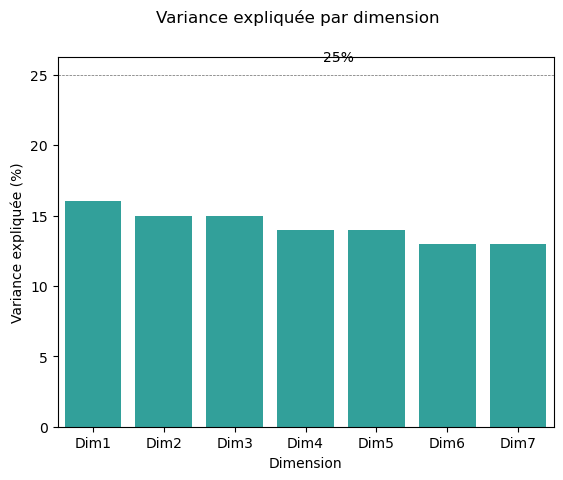

In [142]:
# Scree plot pour choisir le nombre de composantes principales
g_comp = sbn.barplot(x = "Dimension", 
                y = "% variance expliquée",
                palette = ["lightseagreen"],
                data = comp)
g_comp.set(ylabel = "Variance expliquée (%)")
g_comp.figure.suptitle("Variance expliquée par dimension")
plt.axhline(y = 25, linewidth = .5, color = "dimgray", linestyle = "--") # 25 = 100 / 4 (nb dimensions)
plt.text(3.25, 26, "25%")